In [1]:
import squigglepy as sq

from datetime import datetime
from pprint import pprint

from libs import plot_exponential_growth
from params import start_task_length, agi_task_length, doubling_time, shift, current_best_date

print("Loaded libraries")

## START task length (displayed in sec) ##
{1: 1.0,
 5: 1.0,
 10: 1.0,
 20: 1.0,
 30: 1.81,
 40: 3.87,
 50: 7.7,
 60: 14.98,
 70: 30.17,
 80: 68.12,
 90: 211.3,
 95: 547.67,
 99: 3236.02}



## AGI task length (displayed in hrs) ##
{1: 40,
 5: 51,
 10: 80,
 20: 138,
 30: 207,
 40: 292,
 50: 402,
 60: 554,
 70: 775,
 80: 1151,
 90: 2000,
 95: 3123,
 99: 7484}



## DOUBLING TIME (displayed in days) ##
{1: 94,
 5: 118,
 10: 118,
 20: 118,
 30: 135,
 40: 161,
 50: 186,
 60: 212,
 70: 212,
 80: 212,
 90: 221,
 95: 252,
 99: 318}



## SHIFT (displayed in days) ##
{1: 0,
 5: 30,
 10: 56,
 20: 88,
 30: 111,
 40: 131,
 50: 150,
 60: 169,
 70: 188,
 80: 211,
 90: 243,
 95: 270,
 99: 319}
Loaded libraries


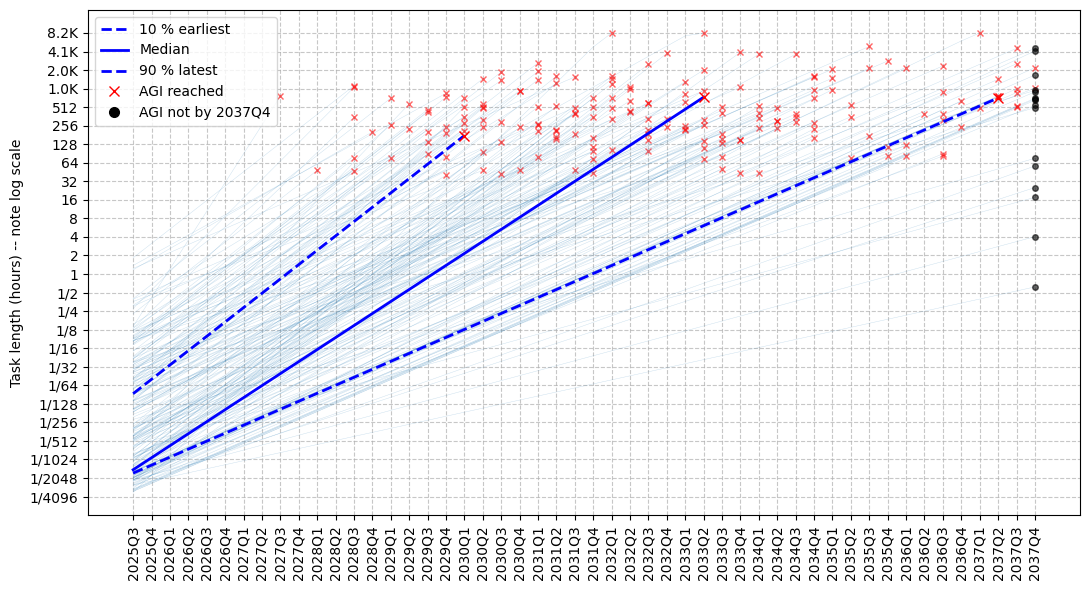

In [2]:
samples = plot_exponential_growth(
    doubling_time_days=doubling_time,
    start_hours=start_task_length,
    start_date=current_best_date,
    agi_task_length=agi_task_length,
    shift=shift,
    n_quarters=49,
    n_samples=100_000,
    n_traces=200,
    max_task_power=13,
    min_y_power=-15,
)

In [3]:
# -----------
# ACCELERATION: Is the curve actually superexponential or subexponential? Does the doubling time itself change? Set the curve parameter.

print("\n\n")
print("## ACCELERATION")
acceleration = sq.mixture(
    [
        [0.1, 1 + sq.lognorm(0.005, 0.1, credibility=80)],
        [0.8, 1],
        [0.1, 1 - sq.lognorm(0.005, 0.1, credibility=80)],
    ]
)
pprint(sq.get_percentiles(acceleration @ 100_000, digits=3))




## ACCELERATION
{1: 0.899,
 5: 0.978,
 10: 1.0,
 20: 1.0,
 30: 1.0,
 40: 1.0,
 50: 1.0,
 60: 1.0,
 70: 1.0,
 80: 1.0,
 90: 1.0,
 95: 1.022,
 99: 1.105}


In [4]:
from libs import run_model, calculate_doubling_time

def adapted_metr_model():
    start_task_length_ = start_task_length * (2 ** (shift / doubling_time))
    days = calculate_doubling_time(start_task_length_, agi_task_length, doubling_time)
    measurement_error_variance = sq.invlognorm(0.8, 1.5) # Add measurement error on tasks: SD fit to trend variance from Figure 12
    return days * measurement_error_variance

samples = run_model(adapted_metr_model, index_date=current_best_date, cores=4)

analyze_agi_arrival(samples)

Generating samples with 4 cores...


100%|███████████████████████████████████████████████████████████████████████████| 100000/100000 [00:28<00:00, 3461.87it/s]


Shuffling data...
Waiting for other cores...


100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2078.96it/s]


...Collected!
{1: 970,
 5: 1397,
 10: 1659,
 20: 2031,
 30: 2344,
 40: 2654,
 50: 2982,
 60: 3346,
 70: 3751,
 80: 4252,
 90: 4982,
 95: 5652,
 99: 7190}

-

{1: '2028 Apr 03',
 5: '2029 Jun 05',
 10: '2030 Feb 22',
 20: '2031 Mar 01',
 30: '2032 Jan 08',
 40: '2032 Nov 13',
 50: '2033 Oct 06',
 60: '2034 Oct 06',
 70: '2035 Nov 15',
 80: '2037 Mar 30',
 90: '2039 Mar 30',
 95: '2041 Jan 28',
 99: '2045 Apr 15'}


NameError: name 'analyze_agi_arrival' is not defined

In [5]:
from libs import analyze_agi_arrival
analyze_agi_arrival(samples)

## DISTRIBUTION OF AGI ARRIVAL DATE ##
1%: 2027.7
2%: 2028.1
3%: 2028.4
4%: 2028.6
5%: 2028.8
10%: 2029.5
15%: 2030.1
20%: 2030.6
25%: 2031.0
35%: 2031.8
50%: 2033.2
60%: 2034.2
75%: 2035.9
80%: 2036.6
90%: 2038.7
95%: 2040.5


## DISTRIBUTION OF RELATIVE AGI ARRIVAL DATE ##
1%: 2.7 years from now
2%: 3.1 years from now
3%: 3.4 years from now
4%: 3.6 years from now
5%: 3.8 years from now
10%: 4.5 years from now
15%: 5.1 years from now
20%: 5.6 years from now
25%: 6.0 years from now
35%: 6.8 years from now
50%: 8.2 years from now
60%: 9.2 years from now
75%: 10.9 years from now
80%: 11.6 years from now
90%: 13.7 years from now
95%: 15.5 years from now
(Mean: 9 years from now)


## AGI ARRIVAL DATE BY BIN ##
2025: 0.0%
2026: 0.2%
2027: 1.5%
2028: 4.4%
2029: 8.0%
2030-2031: 22.9%
2032-2034: 30.8%
2035-2039: 26.4%
2040-2049: 5.7%
2050-2059: 0.1%
2060-2069: 0.0%
2070-2079: 0.0%
2080-2089: 0.0%
2090-2099: 0.0%
>2100: 0.0%


## AGI ARRIVAL DATE BY YEAR ##
By EOY 2025: 0.0%
By EOY 2026: 0.2%
B